In [ ]:
#Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load the dataset
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


In [3]:
df.shape

(72946, 10)

In [4]:
df.dtypes

Unnamed: 0       int64
open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
date            object
dtype: object

In [5]:
# Drop the feature Unnamed:0 no contribution to the dataset
df = df.drop(columns=['Unnamed: 0'])

In [6]:
#check for null values in dataset
df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [20]:
# Applying encoding on categorical features like crypto_name
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['crypto_name'] = le.fit_transform(df['crypto_name'])

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to scale
numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap','crypto_name']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first 5 rows of the scaled data
display(df.head())

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,daily_return,volatility,liquidity_ratio,close_lag1,volatility_lag1,close_MA7,close_MA30
46058,0.000462,0.000203,0.000446,0.000440,0.000167,0.000262,2020-10-31T23:59:59.999Z,0.0,2020-10-31,-0.048380,0.054329,0.638550,0.000462,0.054520,0.000489,0.000595
46121,0.000440,0.000192,0.000429,0.000454,0.000141,0.000271,2020-11-01T23:59:59.999Z,0.0,2020-11-01,0.031970,0.060476,0.521175,0.000440,0.054329,0.000474,0.000610
46195,0.000454,0.000209,0.000442,0.000440,0.000248,0.000263,2020-11-02T23:59:59.999Z,0.0,2020-11-02,-0.030197,0.059793,0.944286,0.000454,0.060476,0.000460,0.000598
46238,0.000440,0.000185,0.000414,0.000415,0.000162,0.000248,2020-11-03T23:59:59.999Z,0.0,2020-11-03,-0.056799,0.060960,0.651671,0.000440,0.059793,0.000446,0.000586
46250,0.000410,0.000199,0.000391,0.000458,0.000243,0.000275,2020-11-05T23:59:59.999Z,0.0,2020-11-05,0.103871,0.075090,0.883820,0.000415,0.060960,0.000443,0.000575


In [22]:
# Engineer new features

# Daily Return
df['daily_return'] = df.groupby('crypto_name')['close'].pct_change()

# Rolling Volatility (using a 7-day rolling window)
df['volatility'] = df.groupby('crypto_name')['daily_return'].rolling(window=7).std().reset_index(0, drop=True)

# Liquidity Ratio (Volume / Market Cap) - handle potential division by zero
df['liquidity_ratio'] = df['volume'] / (df['marketCap'] + 1e-9) # Add a small epsilon to avoid division by zero

# Sort by crypto_name and date to ensure correct calculation of lagged features and moving averages
df = df.sort_values(by=['crypto_name', 'date'])

# Lagged Features (e.g., lag of 1 day)
df['close_lag1'] = df.groupby('crypto_name')['close'].shift(1)
df['volatility_lag1'] = df.groupby('crypto_name')['volatility'].shift(1)

# Moving Averages (e.g., 7-day and 30-day moving averages of closing price)
df['close_MA7'] = df.groupby('crypto_name')['close'].rolling(window=7).mean().reset_index(0, drop=True)
df['close_MA30'] = df.groupby('crypto_name')['close'].rolling(window=30).mean().reset_index(0, drop=True)


# Display the first few rows with new features
display(df.head())


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,daily_return,volatility,liquidity_ratio,close_lag1,volatility_lag1,close_MA7,close_MA30
46058,0.000462,0.000203,0.000446,0.000440,0.000167,0.000262,2020-10-31T23:59:59.999Z,0.0,2020-10-31,NaN,NaN,0.638550,NaN,NaN,NaN,NaN
46121,0.000440,0.000192,0.000429,0.000454,0.000141,0.000271,2020-11-01T23:59:59.999Z,0.0,2020-11-01,0.031970,NaN,0.521175,0.000440,NaN,NaN,NaN
46195,0.000454,0.000209,0.000442,0.000440,0.000248,0.000263,2020-11-02T23:59:59.999Z,0.0,2020-11-02,-0.030197,NaN,0.944286,0.000454,NaN,NaN,NaN
46238,0.000440,0.000185,0.000414,0.000415,0.000162,0.000248,2020-11-03T23:59:59.999Z,0.0,2020-11-03,-0.056799,NaN,0.651671,0.000440,NaN,NaN,NaN
46250,0.000410,0.000199,0.000391,0.000458,0.000243,0.000275,2020-11-05T23:59:59.999Z,0.0,2020-11-05,0.103871,NaN,0.883820,0.000415,NaN,NaN,NaN


In [23]:
# Display descriptive statistics
display(df.describe())

,open,high,low,close,volume,marketCap,crypto_name,daily_return,volatility,liquidity_ratio,close_lag1,volatility_lag1,close_MA7,close_MA30
count,71339.000000,71339.000000,71339.000000,71339.000000,71339.000000,71339.000000,71339.000000,71284.00000,70948.000000,7.133900e+04,71284.000000,70893.000000,7.100900e+04,6.974400e+04
mean,0.013144,0.005639,0.012959,0.013157,0.006426,0.011818,0.511704,inf,0.074620,1.139799e+03,0.013158,0.074613,1.318861e-02,1.330291e-02
std,0.078289,0.033647,0.077258,0.078327,0.027695,0.059475,0.285603,NaN,1.656463,2.173190e+04,0.078342,1.657105,7.837998e-02,7.856824e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000,0.000000,0.000000e+00,0.000000,0.000000,1.234545e-16,4.981142e-16
25%,0.000003,0.000001,0.000002,0.000003,0.000026,0.000160,0.277778,-0.02559,0.027982,1.020313e-01,0.000003,0.027972,2.572066e-06,2.654545e-06
50%,0.000025,0.000011,0.000025,0.000025,0.000331,0.001051,0.518519,0.00000,0.046746,2.910959e-01,0.000025,0.046721,2.574843e-05,2.699784e-05
75%,0.000407,0.000177,0.000392,0.000408,0.001987,0.004160,0.759259,0.02698,0.072104,8.435776e-01,0.000408,0.072072,4.136879e-04,4.211594e-04
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,166.756791,2.775011e+06,1.000000,166.756791,9.683071e-01,9.245735e-01


In [24]:
df.isnull().sum()

open                  0
high                  0
low                   0
close                 0
volume                0
marketCap             0
timestamp             0
crypto_name           0
date                  0
daily_return         55
volatility          391
liquidity_ratio       0
close_lag1           55
volatility_lag1     446
close_MA7           330
close_MA30         1595
dtype: int64

In [25]:
# Drop rows with nulls in engineered columns
df = df.dropna(subset=['daily_return', 'volatility', 'close_lag1', 'volatility_lag1', 'close_MA7', 'close_MA30'])

In [26]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,daily_return,volatility,liquidity_ratio,close_lag1,volatility_lag1,close_MA7,close_MA30
47496,0.001131,0.000486,0.001067,0.001108,0.000766,0.000700,2020-12-01T23:59:59.999Z,0.0,2020-12-01,-0.020298,0.085748,1.095367,0.001131,0.085858,0.001001,0.000873
47535,0.001108,0.000555,0.001090,0.001278,0.001171,0.000808,2020-12-02T23:59:59.999Z,0.0,2020-12-02,0.153000,0.092464,1.449895,0.001108,0.085748,0.001042,0.000901
47586,0.001279,0.000580,0.001252,0.001357,0.001112,0.000858,2020-12-03T23:59:59.999Z,0.0,2020-12-03,0.062004,0.077352,1.296399,0.001278,0.092464,0.001106,0.000931
47655,0.001357,0.000572,0.001207,0.001208,0.000981,0.000764,2020-12-04T23:59:59.999Z,0.0,2020-12-04,-0.109449,0.100932,1.283654,0.001357,0.077352,0.001143,0.000956
47713,0.001208,0.000567,0.001203,0.001360,0.000915,0.000861,2020-12-05T23:59:59.999Z,0.0,2020-12-05,0.125901,0.096515,1.062330,0.001208,0.100932,0.001209,0.000988


In [30]:
df.dtypes

open                           float64
high                           float64
low                            float64
close                          float64
volume                         float64
marketCap                      float64
timestamp          datetime64[ns, UTC]
crypto_name                    float64
date                    datetime64[ns]
daily_return                   float64
volatility                     float64
liquidity_ratio                float64
close_lag1                     float64
volatility_lag1                float64
close_MA7                      float64
close_MA30                     float64
dtype: object

In [28]:
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [33]:
# Extracting features from date column
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Weekday'] = df['timestamp'].dt.weekday
df['Hour'] = df['timestamp'].dt.hour



In [34]:

df



,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,daily_return,...,liquidity_ratio,close_lag1,volatility_lag1,close_MA7,close_MA30,Year,Month,Day,Weekday,Hour
47496,0.001131,0.000486,0.001067,0.001108,0.000766,0.000700,2020-12-01 23:59:59.999000+00:00,0.0,2020-12-01,-0.020298,...,1.095367,0.001131,0.085858,0.001001,0.000873,2020,12,1,1,23
47535,0.001108,0.000555,0.001090,0.001278,0.001171,0.000808,2020-12-02 23:59:59.999000+00:00,0.0,2020-12-02,0.153000,...,1.449895,0.001108,0.085748,0.001042,0.000901,2020,12,2,2,23
47586,0.001279,0.000580,0.001252,0.001357,0.001112,0.000858,2020-12-03 23:59:59.999000+00:00,0.0,2020-12-03,0.062004,...,1.296399,0.001278,0.092464,0.001106,0.000931,2020,12,3,3,23
47655,0.001357,0.000572,0.001207,0.001208,0.000981,0.000764,2020-12-04 23:59:59.999000+00:00,0.0,2020-12-04,-0.109449,...,1.283654,0.001357,0.077352,0.001143,0.000956,2020,12,4,4,23
47713,0.001208,0.000567,0.001203,0.001360,0.000915,0.000861,2020-12-05 23:59:59.999000+00:00,0.0,2020-12-05,0.125901,...,1.062330,0.001208,0.100932,0.001209,0.000988,2020,12,5,5,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72716,0.000007,0.000003,0.000007,0.000007,0.009751,0.019263,2022-09-25 23:59:59.999000+00:00,1.0,2022-09-25,0.272698,...,0.506194,0.000006,0.034646,0.000006,0.000005,2022,9,25,6,23
72768,0.000007,0.000003,0.000007,0.000007,0.004343,0.017569,2022-10-02 23:59:59.999000+00:00,1.0,2022-10-02,-0.088865,...,0.247175,0.000007,0.099586,0.000006,0.000005,2022,10,2,6,23
72806,0.000008,0.000003,0.000008,0.000008,0.005098,0.020887,2022-10-09 23:59:59.999000+00:00,1.0,2022-10-09,0.189842,...,0.244071,0.000007,0.112896,0.000006,0.000005,2022,10,9,6,23
72859,0.000007,0.000003,0.000007,0.000007,0.002932,0.018695,2022-10-16 23:59:59.999000+00:00,1.0,2022-10-16,-0.106824,...,0.156819,0.000008,0.121977,0.000006,0.000005,2022,10,16,6,23


In [41]:
# Model Training and Evaluation
# This section will be implemented in a separate notebook for clarity and modularity.
# The dataset is now ready for model training and evaluation.
# The next steps would typically involve splitting the dataset into training and testing sets.

X = df.drop(columns=['volatility','date','timestamp'])
y = df['volatility']

In [42]:
#Model Training and Evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The dataset is now ready for model training and evaluation.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# The model is trained and can be evaluated using the test set.
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 1.9040996855791357
R^2 Score: 0.5223659507451399
Root Mean Squared Error: 1.3798911861372025


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [46]:
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print(f'Best Model Mean Squared Error: {mse_best}')
print(f'Best Model R^2 Score: {r2_best}')
print(f'Best Model Root Mean Squared Error: {rmse_best}')

Best Model Mean Squared Error: 1.3490200108895167
Best Model R^2 Score: 0.6616049594425417
Best Model Root Mean Squared Error: 1.161473207133732


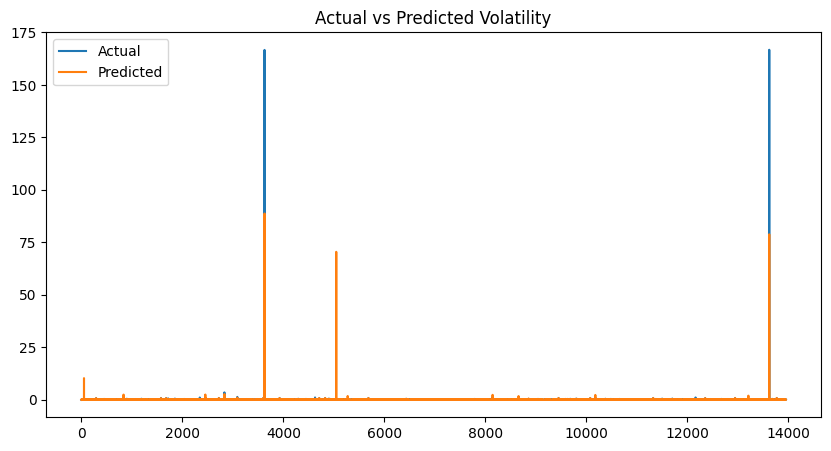

In [ ]:
# visualizations
#1. Actual vs Predicted Volatility (already implemented)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_best, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Volatility')
plt.show()

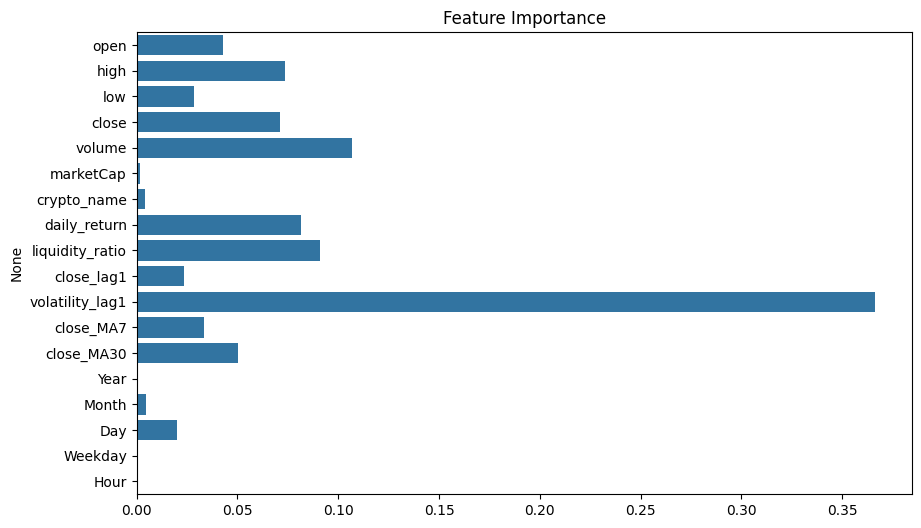

In [50]:
# 2. Feature Importance
importances = best_model.feature_importances_
feature_names = X_train.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

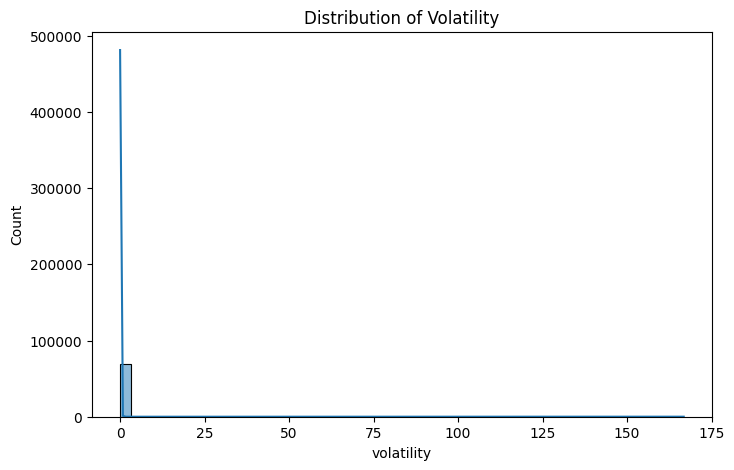

In [51]:
# 3. Distribution of Volatility
plt.figure(figsize=(8,5))
sns.histplot(df['volatility'], bins=50, kde=True)
plt.title('Distribution of Volatility')
plt.show()

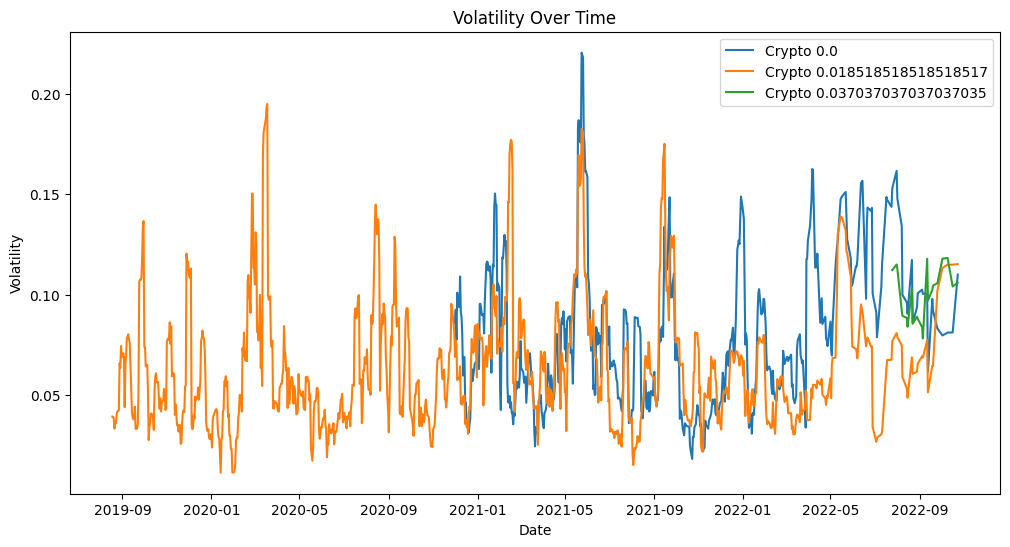

In [52]:
# 4. Volatility Over Time
plt.figure(figsize=(12,6))
for crypto in df['crypto_name'].unique()[:3]:  # Plot for first 3 cryptos
    subset = df[df['crypto_name'] == crypto]
    plt.plot(subset['date'], subset['volatility'], label=f'Crypto {crypto}')
plt.legend()
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

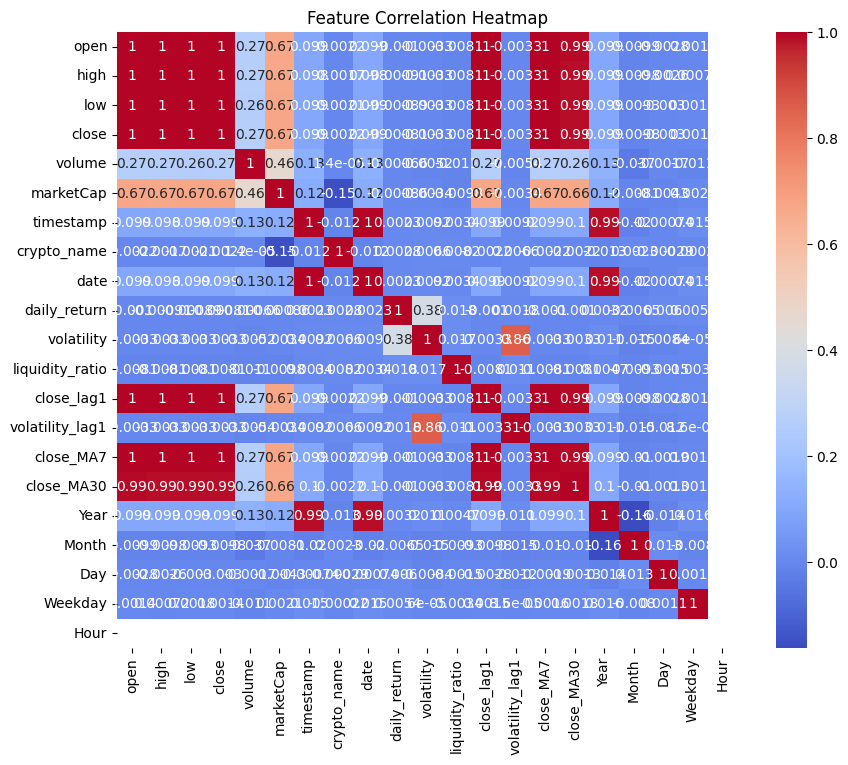

In [53]:
# 5. Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Here’s an explanation of each plot and the insights you can gain:

# 1. Actual vs Predicted Volatility

# Plot: Line plot comparing true volatility values (y_test) with model predictions (y_pred_best).
# Insight: Shows how well your model tracks real volatility. If lines overlap closely, your model is accurate. Large gaps indicate prediction errors or areas for improvement.
# Feature Importance

# 2.Feature Importance
# Plot: Bar plot of feature importances from the Random Forest model.
# Insight: Reveals which features most influence volatility predictions. High importance means the feature is critical for the model. Use this to focus future feature engineering or reduce less important features.
# Distribution of Volatility

#3. Distribution of Volatility
# Plot: Histogram (with KDE) of the volatility column.
# Insight: Shows the spread and shape of volatility values. Helps identify skewness, outliers, or if volatility is concentrated in certain ranges. Useful for understanding the target variable.
# Volatility Over Time

#4. Volatility Over Time
# Plot: Line plot of volatility for the first three cryptocurrencies over time.
# Insight: Visualizes how volatility changes for different cryptos. You can spot trends, cycles, or periods of high/low volatility. Useful for time series analysis and understanding market behavior.
# Correlation Heatmap

#5 .Correlation Heatmap
# Plot: Heatmap of correlations between all numerical features.
# Insight: Shows relationships between features. High positive/negative correlations may indicate redundancy or multicollinearity. Use this to select features, engineer new ones, or understand dependencies in your data.
# These visualizations together provide a comprehensive view of model performance, feature relevance, data distribution, temporal patterns, and inter-feature relationships.